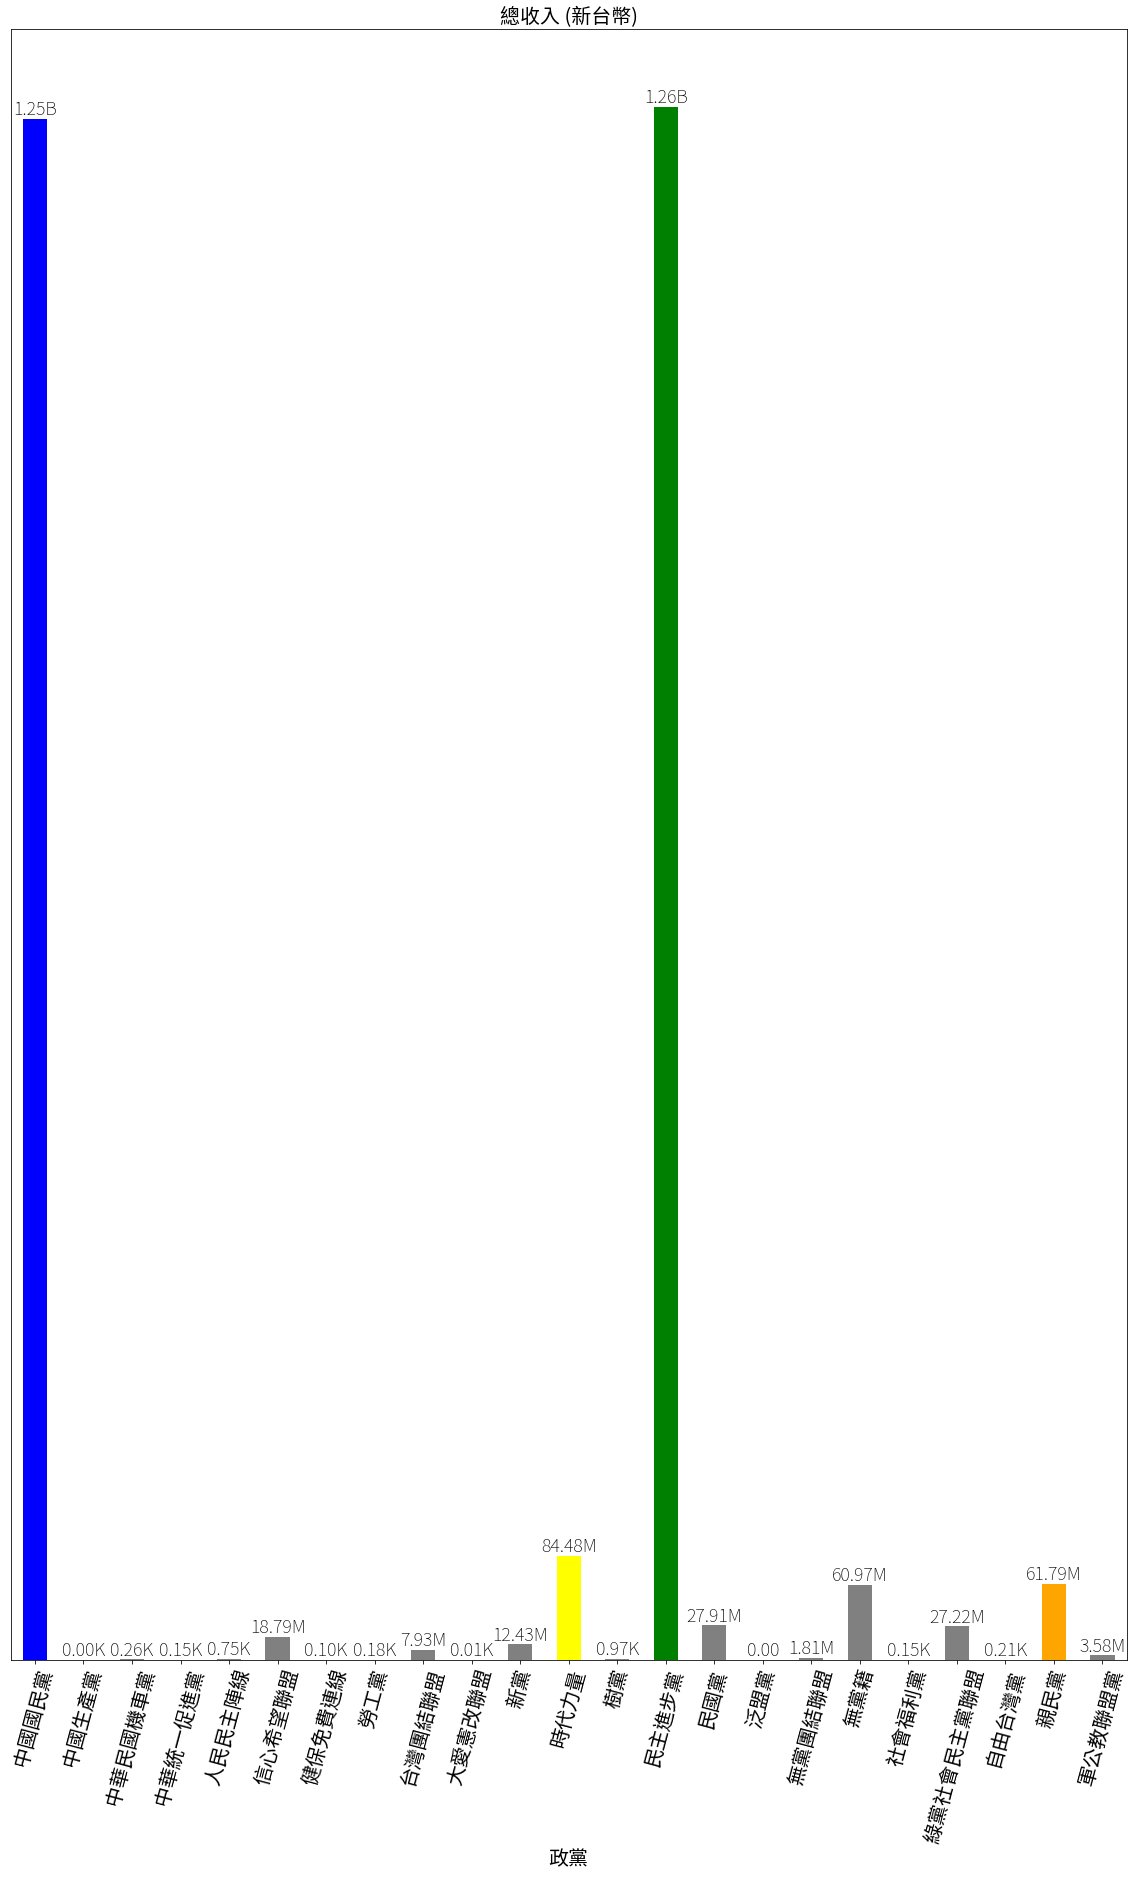

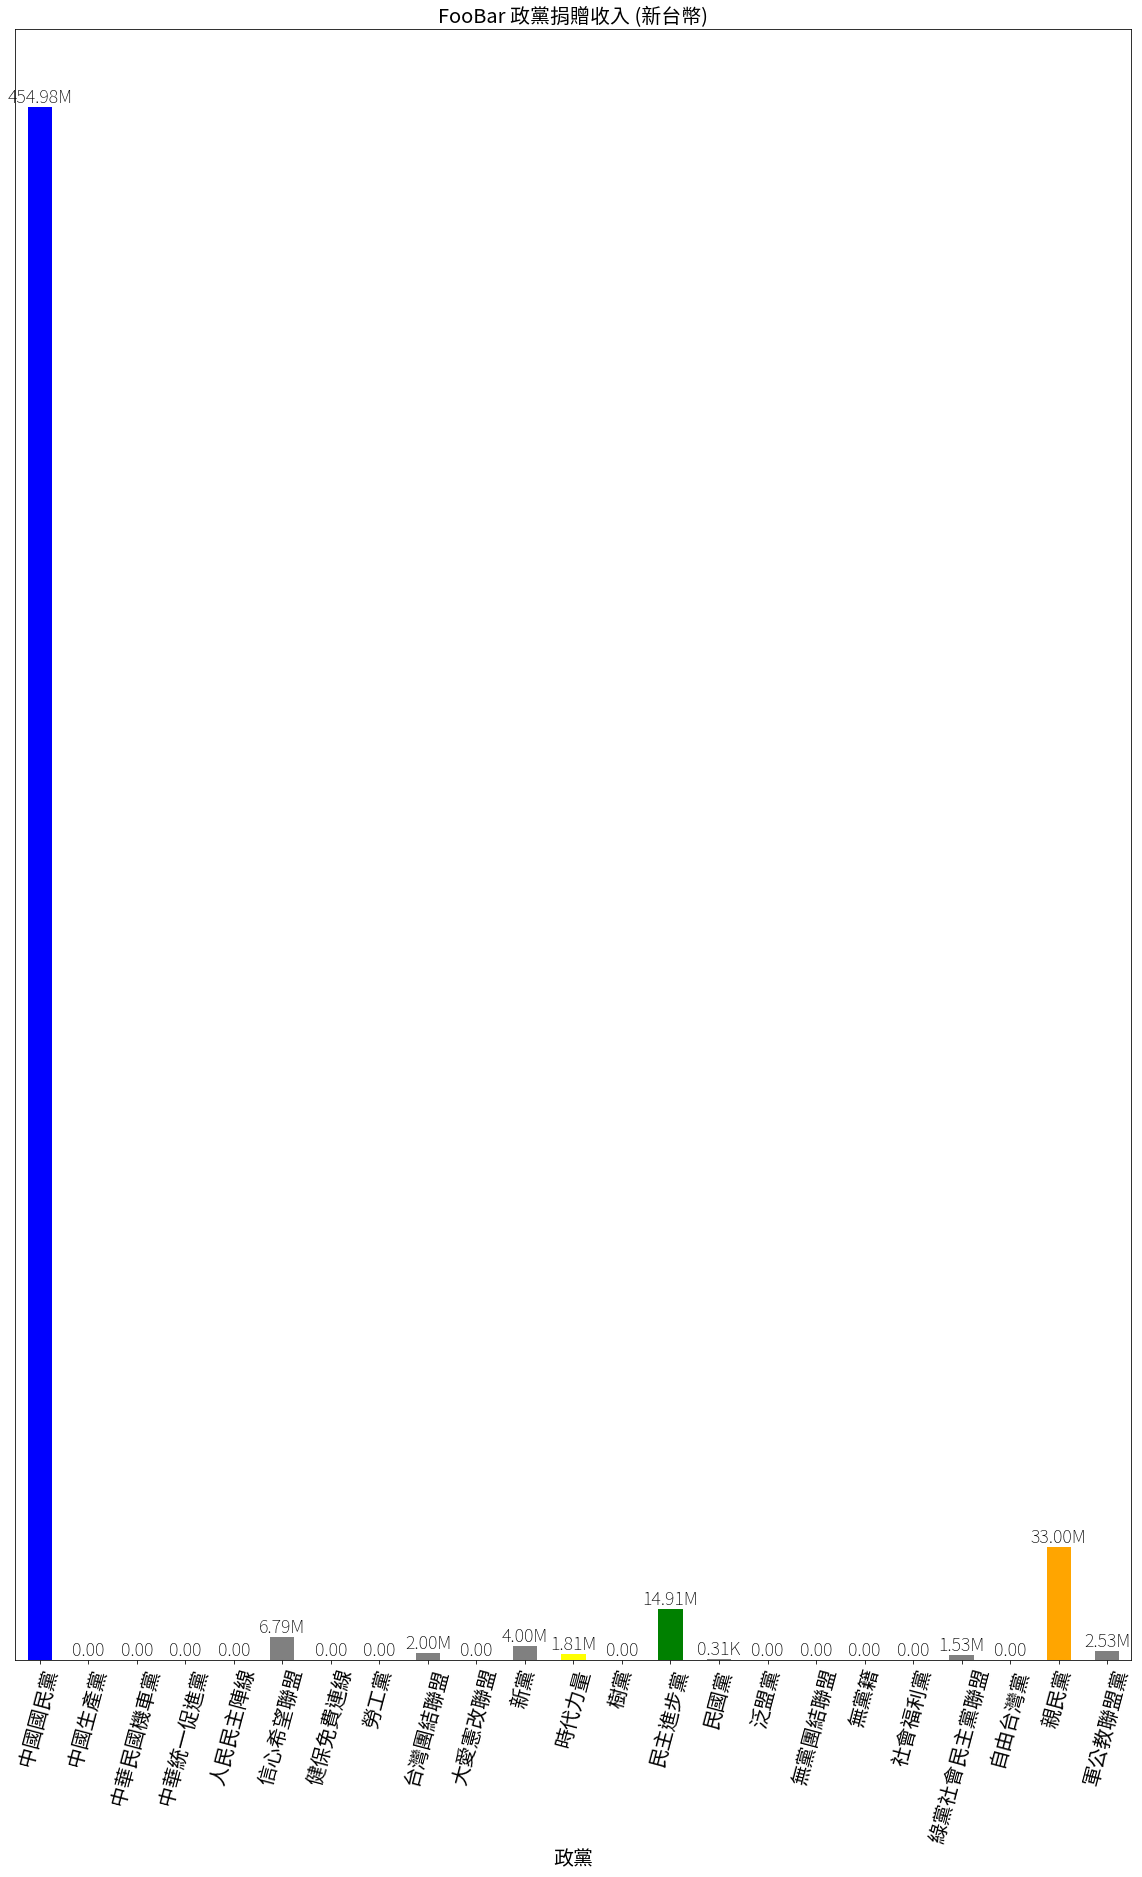

In [18]:
import pandas as pd
from matplotlib import font_manager, pyplot as plt

font = font_manager.FontProperties(fname="./NotoSansTC-Regular.otf", size=20)
fontThin = font_manager.FontProperties(fname="./NotoSansTC-Thin.otf", size=18)
plt.rcParams['figure.figsize'] = (20, 30)

def fmt(val):
    if val > 1000000000:
        return '%1.2fB' % (val*1e-9)
    elif val > 1000000:
        return '%1.2fM' % (val*1e-6)
    elif val > 1000:
        return '%1.2fK' % (val*1e-6)
    else:
        return '%1.2f' % (val*1e-0)
    
def bar_color(df):
    df['color'] = 'grey'
    df.loc[df['推薦政黨'] == '中國國民黨', 'color'] = 'blue'
    df.loc[df['推薦政黨'] == '民主進步黨', 'color'] = 'green'
    df.loc[df['推薦政黨'] == '時代力量', 'color'] = 'yellow'
    df.loc[df['推薦政黨'] == '親民黨', 'color'] = 'orange'
    
def df_plot(y):
    ax = total.plot(total.columns[0], y, kind='bar', rot=75, color=total['color'])
    ax.set_xlabel("政黨", fontproperties=font)
    ax.get_yaxis().set_visible(False)
    ax.legend().set_visible(False)
    
    return ax
    
def df_text(ax, labels):
    for rect, label in zip(ax.patches, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom', fontproperties=fontThin)
        
    for xticklabel in ax.get_xticklabels():
        xticklabel.set_fontproperties(font)

df = pd.read_csv('./A05_basic_all.csv')
df['政黨捐贈收入'] = df['政黨捐贈收入'].str.replace(',', '').astype('int64')
by_party = df.groupby('推薦政黨', as_index=False)

aggregator = {'總收入': 'sum', '政黨捐贈收入': 'sum'}
total = by_party[['總收入', '政黨捐贈收入']].agg(aggregator)

bar_color(total)
ax = df_plot(total.columns[1])
labels = [fmt(i) for i in total['總收入']]
df_text(ax, labels)
ax.set_title("總收入 (新台幣)", fontproperties=font)

plt.show()

# foo_bar KMT #

plt.clf()

ax = df_plot(total.columns[2])
labels = [fmt(i) for i in total['政黨捐贈收入']]
df_text(ax, labels)
ax.set_title("FooBar 政黨捐贈收入 (新台幣)", fontproperties=font)

plt.show()